In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the Titanic dataset
titanic = sns.load_dataset("titanic")

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


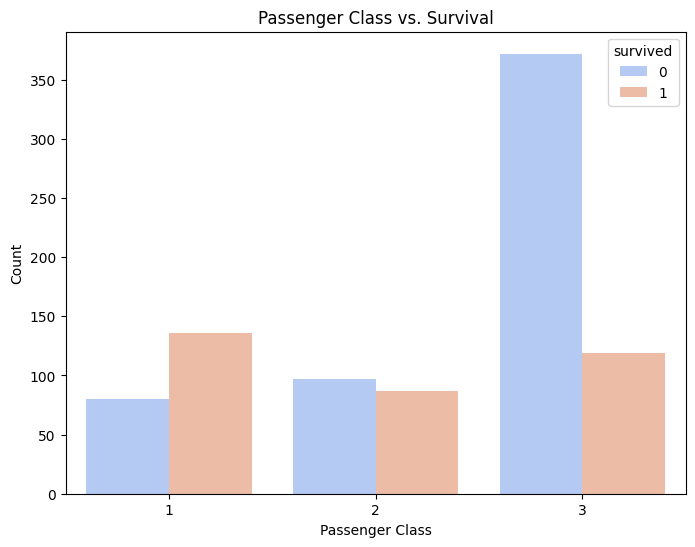

In [ ]:
# Data Analysis and Visualization
# Let's create four relevant graphs for data analysis.

# 1. Countplot of passenger class
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', data=titanic, hue='survived', palette='coolwarm')
plt.title('Passenger Class vs. Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

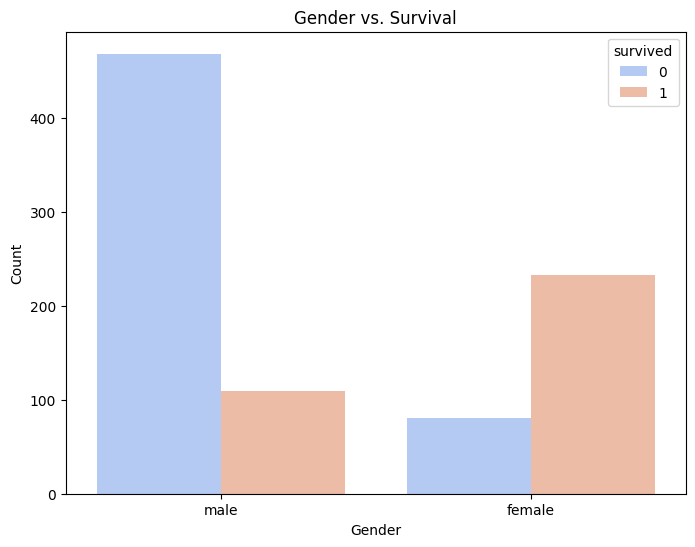

In [ ]:
# 2. Countplot of gender
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=titanic, hue='survived', palette='coolwarm')
plt.title('Gender vs. Survival')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

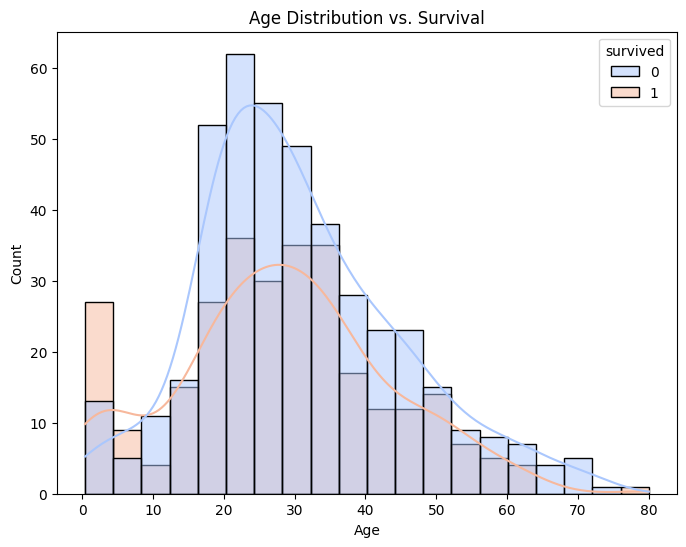

In [ ]:
# 3. Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic, x='age', kde=True, hue='survived', palette='coolwarm')
plt.title('Age Distribution vs. Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

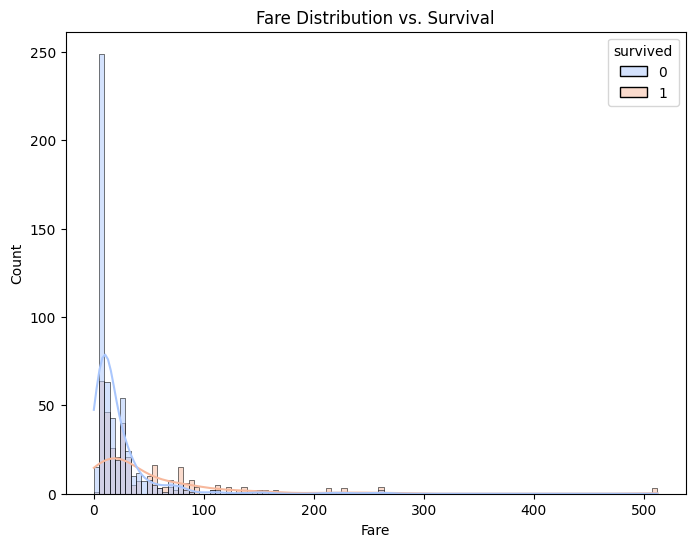

In [ ]:
# 4. Fare distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic, x='fare', kde=True, hue='survived', palette='coolwarm')
plt.title('Fare Distribution vs. Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

In [ ]:
# Data Preprocessing
# Drop rows with missing values in 'age' columns
titanic.dropna(subset=['age'], inplace=True)



In [ ]:
# Convert categorical variables to dummy variables automatically
titanic = pd.get_dummies(titanic, drop_first=True)

In [ ]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
2,1,3,26.0,0,0,7.9250,False,True,False,False,...,True,False,False,False,False,False,False,False,True,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,...,True,False,True,False,False,False,False,False,True,True
4,0,3,35.0,0,0,8.0500,True,True,True,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# Select features (predictors) and target variable
X = titanic.drop('survived', axis=1)
y = titanic['survived']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)

print("Classification Report:\n", classification_rep)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        56

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



In [ ]:
conf_matrix

array([[87,  0],
       [ 0, 56]])

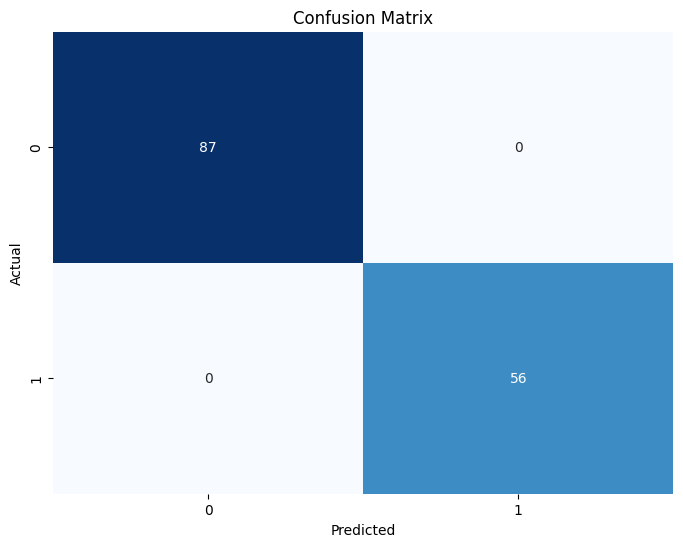

In [ ]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()